# World Happiness Report

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
# Reading the csv file from dataset

df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In the given dataset Happiness Score is the target variable and the remaining columns are independent variables.

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Showing first 5 rows of the dataset.

# EDA

In [4]:
df.shape

(158, 12)

There are 158 rows and 12 columns are there in this dataset.

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

This prints the list datatypes of all columns. Here the target variable Happiness Score has float data type, country and region has object data type and Happiness Rank has integer datatype. Remaining are all independent variable which is of float type. In default the dataset has object data type.

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

This shows how many columns are there in the dataset.

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in the given dataset. So the dataset is cleaned.

In [8]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

This shows the number of unque values in each column.

In [9]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

This gives the unique occurrence in the target variable Happiness Score.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This shows what kind of information we have in World Happiness Report.

# Description of Dataset

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This shows some statistical summaries of the numerical columns data. To see the statistical details of the dataset, we can use describe()

Here we find some statistical data like count, mean, std, min etc.

# Univariate analysis

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

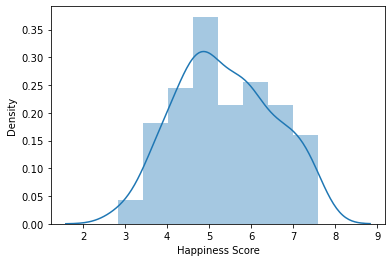

In [12]:
sns.distplot(df['Happiness Score'])

This distplot shows the data is normally distributed.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

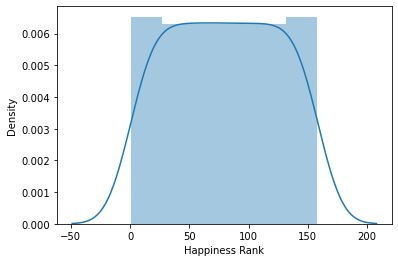

In [13]:
sns.distplot(df['Happiness Rank'])

This distplot shows the data is normally distributed.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

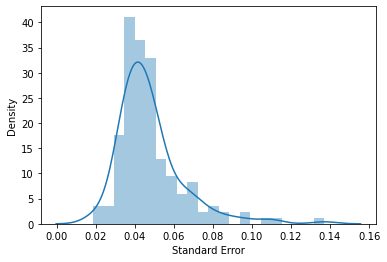

In [14]:
sns.distplot(df['Standard Error'])

This distplot shows the data is not distributed normally and has skewness.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

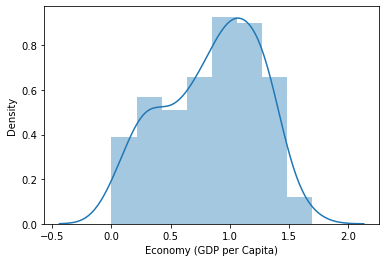

In [15]:
sns.distplot(df['Economy (GDP per Capita)'])

The data is normally distributed.

<AxesSubplot:xlabel='Family', ylabel='Density'>

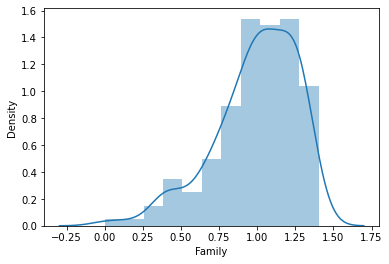

In [16]:
sns.distplot(df['Family'])

This distplot shows the data is not distributed normally and has skewness.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

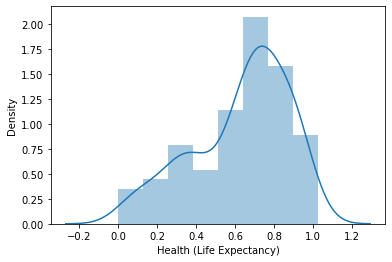

In [17]:
sns.distplot(df['Health (Life Expectancy)'])

This distplot shows the data is not distributed normally and has skewness.

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

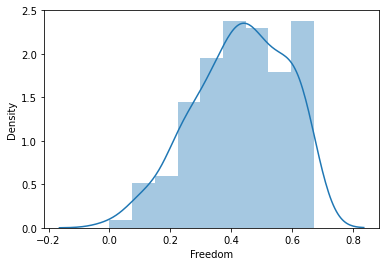

In [18]:
sns.distplot(df['Freedom'])

The data is not distributed normally. It has some skewness.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

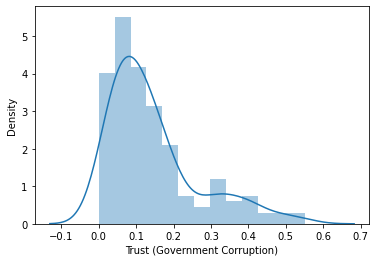

In [19]:
sns.distplot(df['Trust (Government Corruption)'])

This distplot shows the data is not distributed normally and has skewness.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

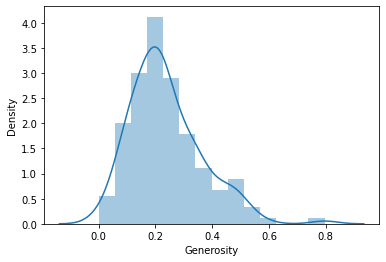

In [20]:
sns.distplot(df['Generosity'])

This distolot shows the data is not distributed normally and has skewness.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

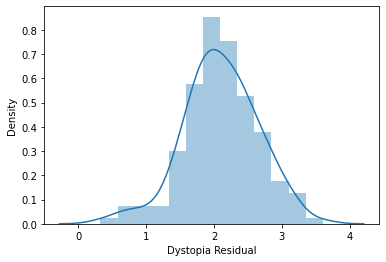

In [21]:
sns.distplot(df['Dystopia Residual'])

The data is normally distributed.

# Identifying the outliers

<AxesSubplot:>

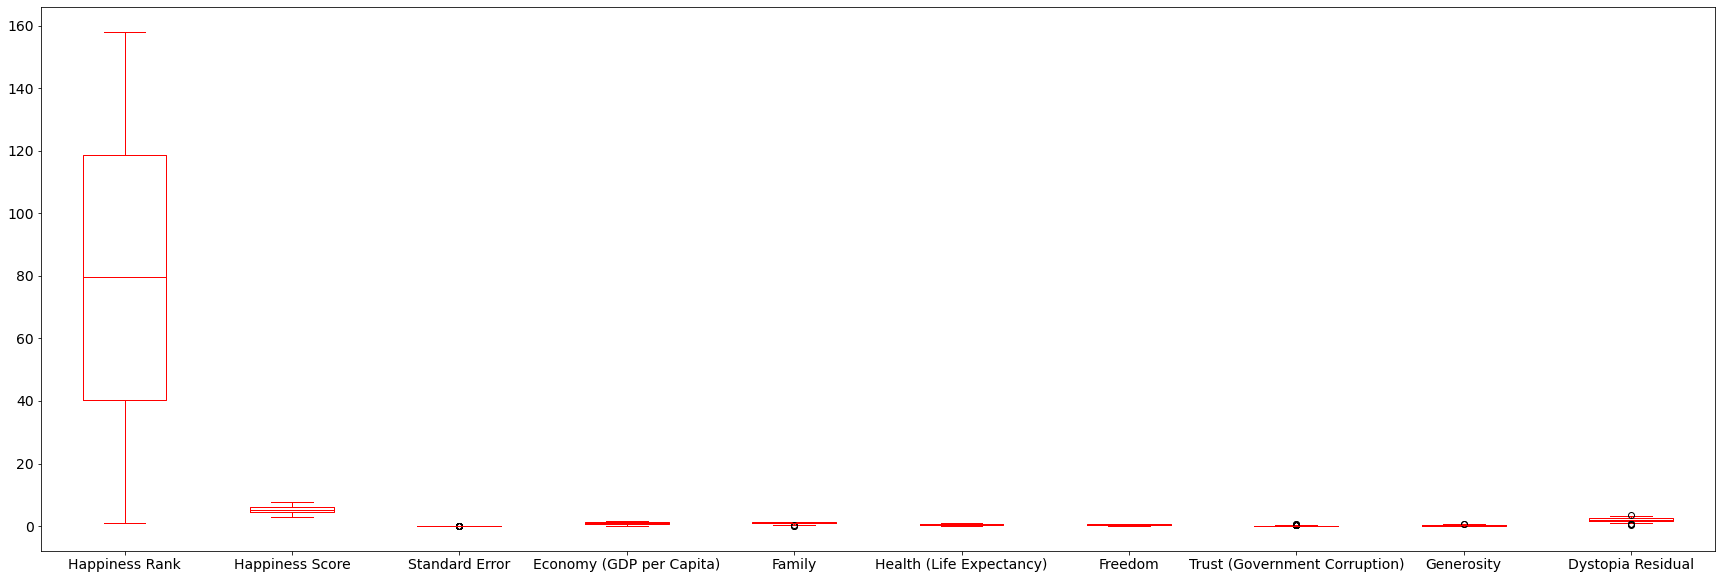

In [22]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

We can observe that the outliers present in the columns Standard Error, Family, Trust(Government Corruption), Generosity and Dystopia Residual.

# Bivariate analysis

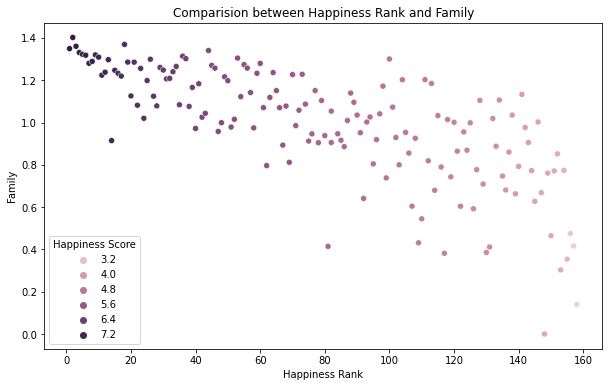

In [23]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Happiness Rank and Family')
sns.scatterplot(df['Happiness Rank'],df['Family'],hue=df["Happiness Score"]);

This scatterplot shows the comparision of Happiness Rank and Family on the basis of target variable Happiness Score.

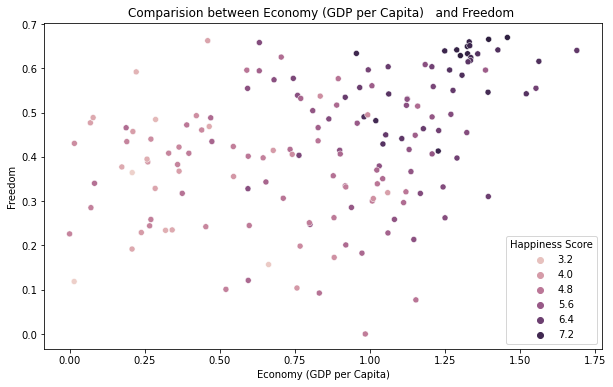

In [24]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Economy (GDP per Capita)   and Freedom ')
sns.scatterplot(df['Economy (GDP per Capita)'],df['Freedom'],hue=df["Happiness Score"]);

This scatterplot shows the comparision of Economy (GDP per Capita) and Freedom on the basis of target variable Happiness Score.

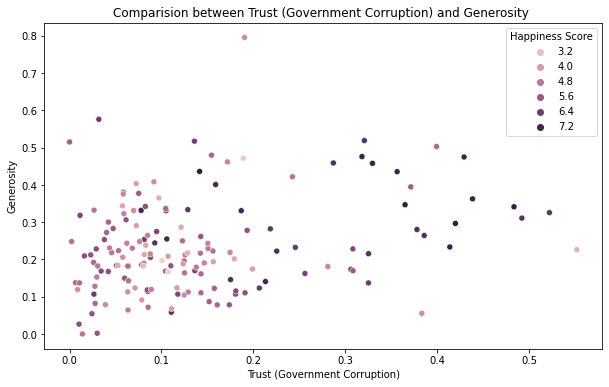

In [25]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Trust (Government Corruption) and Generosity ')
sns.scatterplot(df['Trust (Government Corruption)'],df['Generosity'],hue=df["Happiness Score"]);

This scatterplot shows the comparision between Trust (Government Corruption) and Generosity on the basis of Happiness Score.

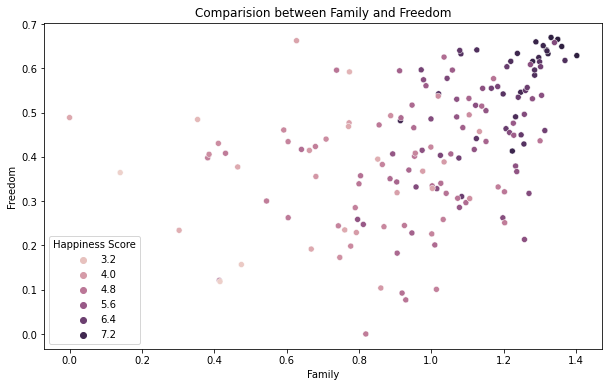

In [26]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Family and Freedom')
sns.scatterplot(df['Family'],df['Freedom'],hue=df["Happiness Score"]);

Here we can observe how the Family and Freedom varies on the basis of Happiness Score

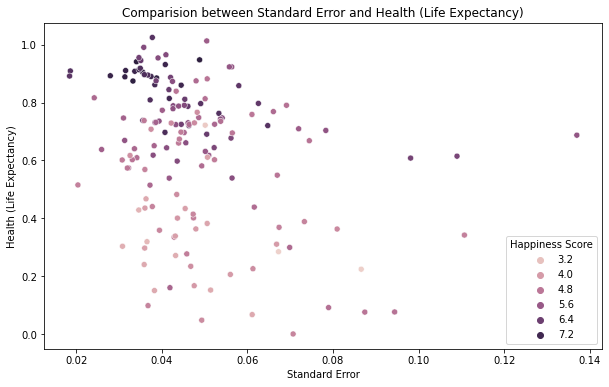

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Standard Error and Health (Life Expectancy)')
sns.scatterplot(df['Standard Error'],df['Health (Life Expectancy)'],hue=df["Happiness Score"]);

This scatterplot shows the comparision between Standard Error and Health (Life Expectancy) on the basis of Happiness Score.

# Multivariate analysis

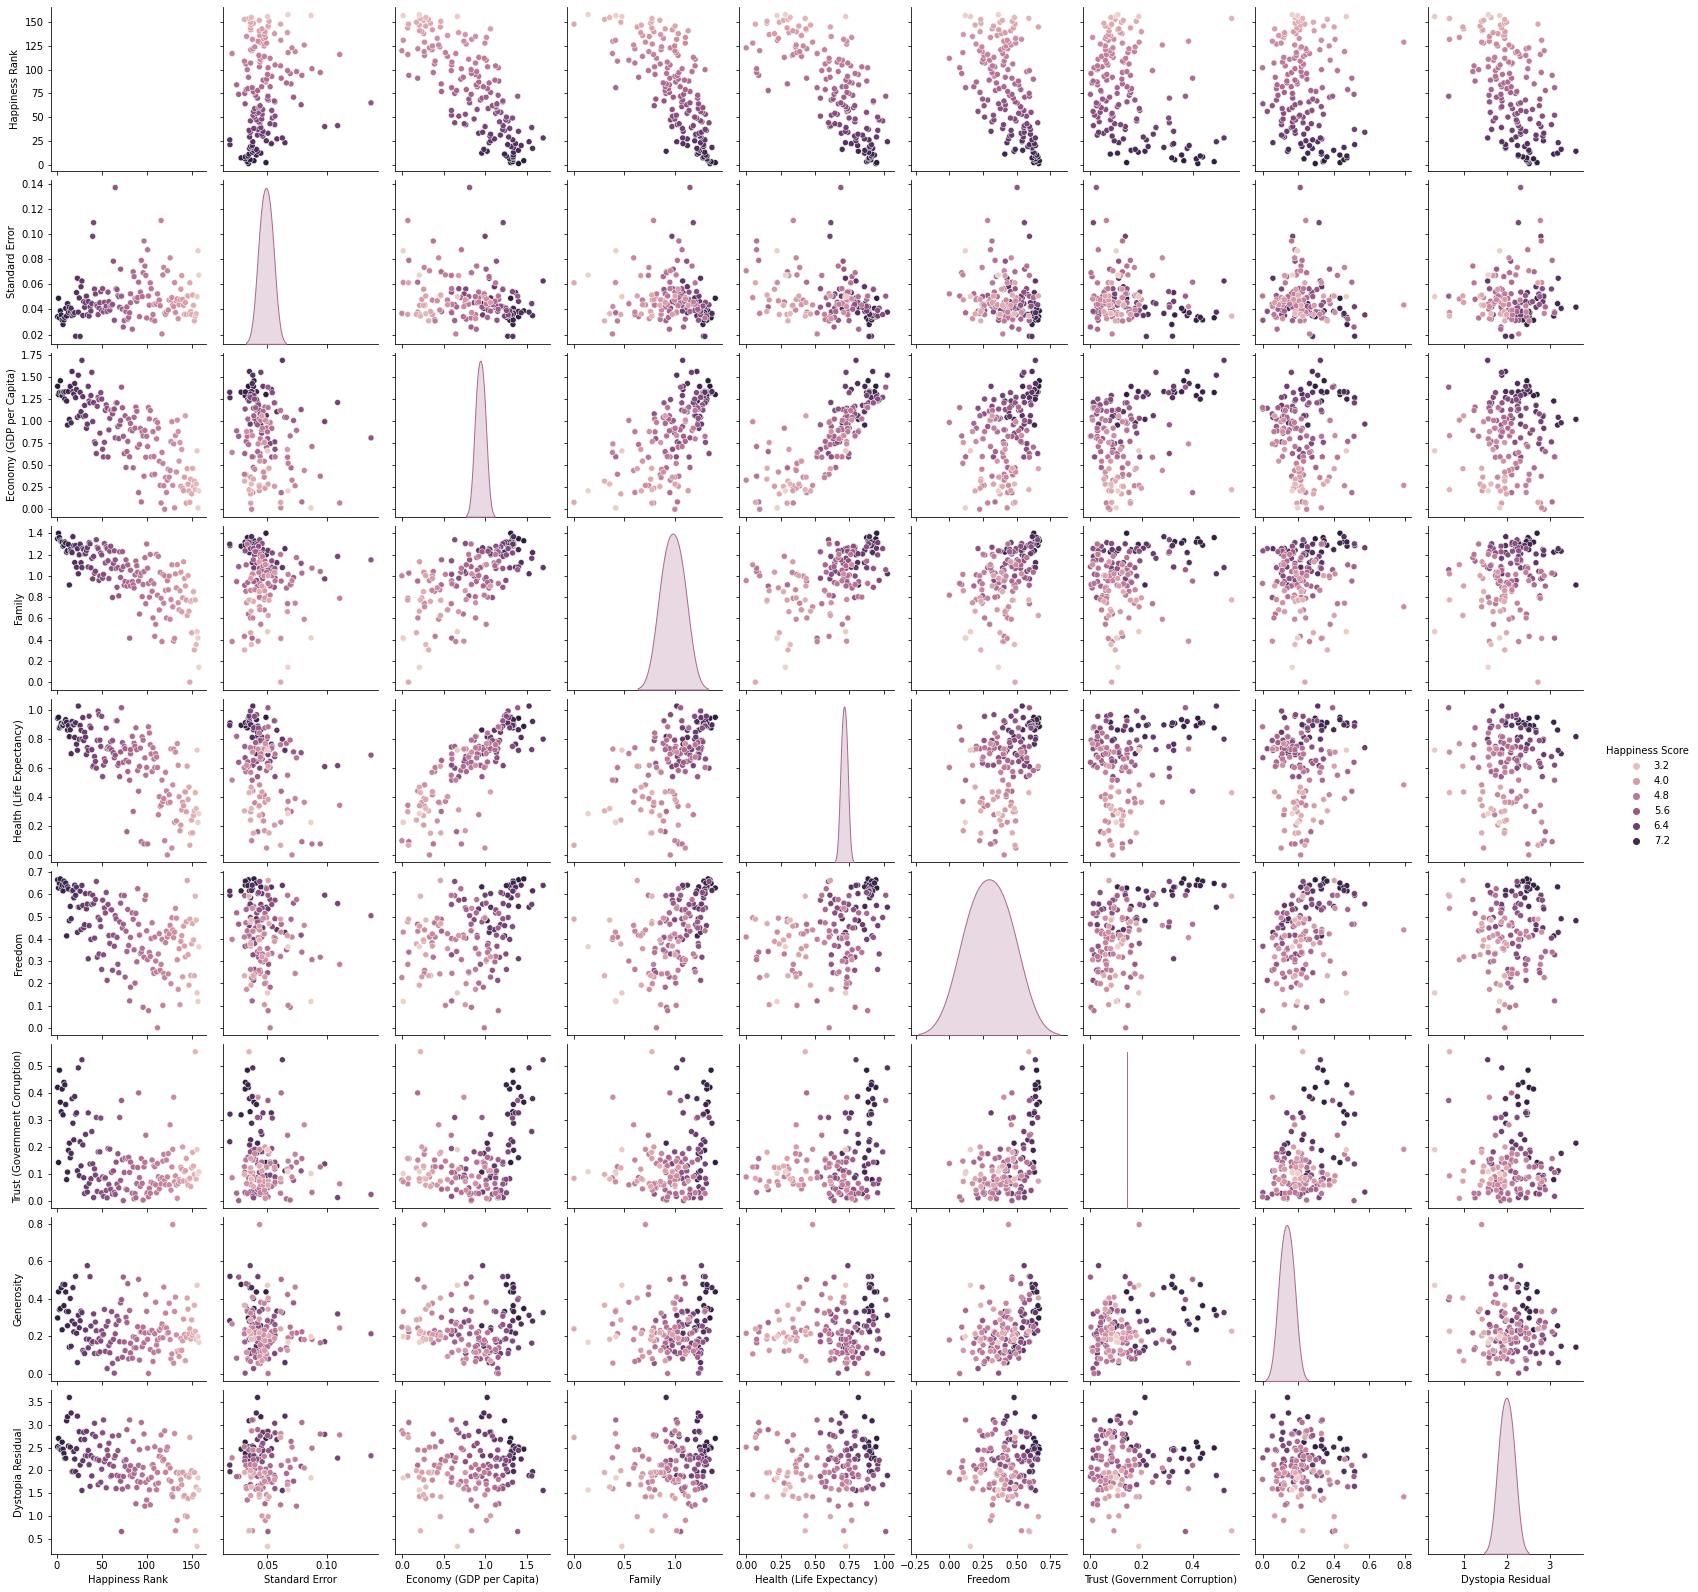

In [28]:
sns.pairplot(df,hue="Happiness Score")

This is the pairplot for all the columns in the dataset on the basis of target variable Happiness Score.

# Encoding the DataFrame

In [29]:
from sklearn.preprocessing import LabelEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Now we have converted the string data to numerical data using ordinal encoder.

# Correlation between the target variable and independent variables using HEAT map

In [30]:
cor = df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


This gives the correlation between the target variable and the independent variables.

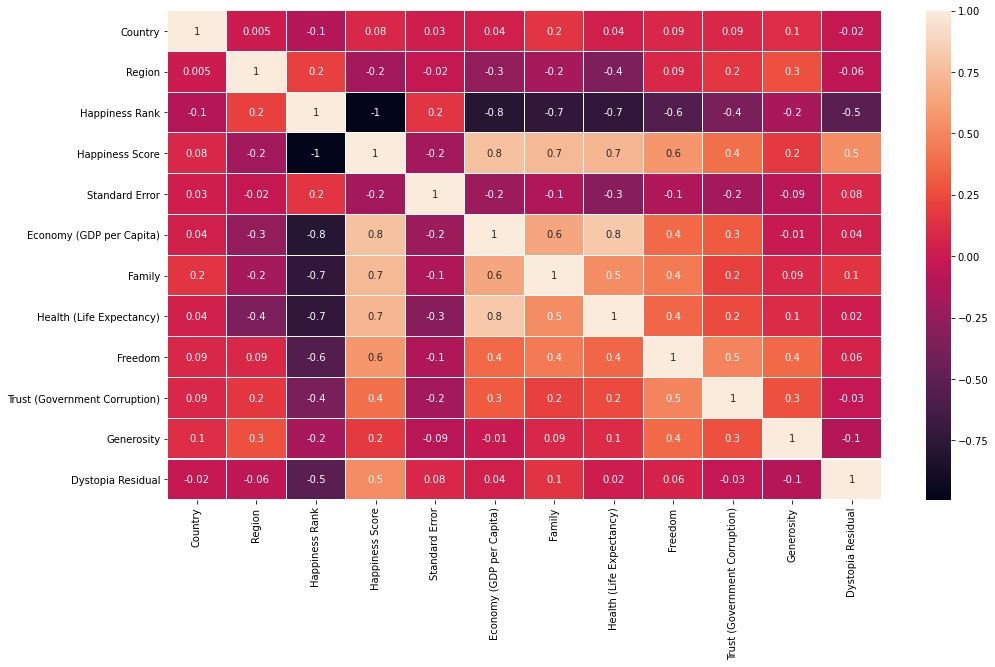

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='.1g', annot = True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. That is the relation between one feature vs another feature also feature vs target.

Light shades are highly correlated.
Dark shades are very less correlated.
Economy(GDP per Capita), Family, Health(Life Expectancy) and Freedom are highly positively correlated with the target variable Happiness Rank.
Dystopia Residual and Trust are positively correlated with the target variable.
Happiness Rank is highly negatively correlated with Happiness Score
Standard Error and Region are negatively correlated with the target variable.

# Removing outliers

In [32]:
df.shape

(158, 12)

In [33]:
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

We are removing the outliers using zscore

In [34]:
new_df = df[(z<3).all(axis=1)]
new_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


This is the new dataframe after removing the outliers.

In [35]:
df.shape

(158, 12)

The original dataset contains 158 rows and 12 columns.

In [36]:
new_df.shape

(149, 12)

The new dataframe contains 149 rows and 12 columns.

In [37]:
9/158

0.056962025316455694

This is the percentage loss of our data. Here I am not losing more data so I am removing the outliers.

# Checking skewness

In [38]:
new_df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Here we can observe that some columns are highly skewed and these columns are not in the accceptable range +0.5 or -0.5. So we need to remove it.

In [39]:
df1 = new_df

In [40]:
features = ['Standard Error','Family', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity']

In [41]:
scaler = PowerTransformer(method='yeo-johnson')
'''
Parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nParameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [42]:
new_df[features] = scaler.fit_transform(df1[features].values)
new_df[features]

,Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,-0.950337,1.658880,1.469636,1.817625,0.659579
1,0.378562,2.009125,1.511292,0.329676,1.562604
2,-1.041401,1.730785,1.053469,1.953400,0.977226
3,-0.471124,1.540248,1.117188,1.664359,1.015018
4,-0.799032,1.487718,1.242549,1.541247,1.682150
...,...,...,...,...,...
150,0.563000,-1.047195,-1.707662,0.681035,-0.131736
151,-0.068119,-0.778550,-1.435893,0.188577,0.012019
152,-1.320810,-2.087389,-1.352388,-0.192843,1.134258
154,-0.692726,-2.010443,-1.309709,-0.434498,-0.312080


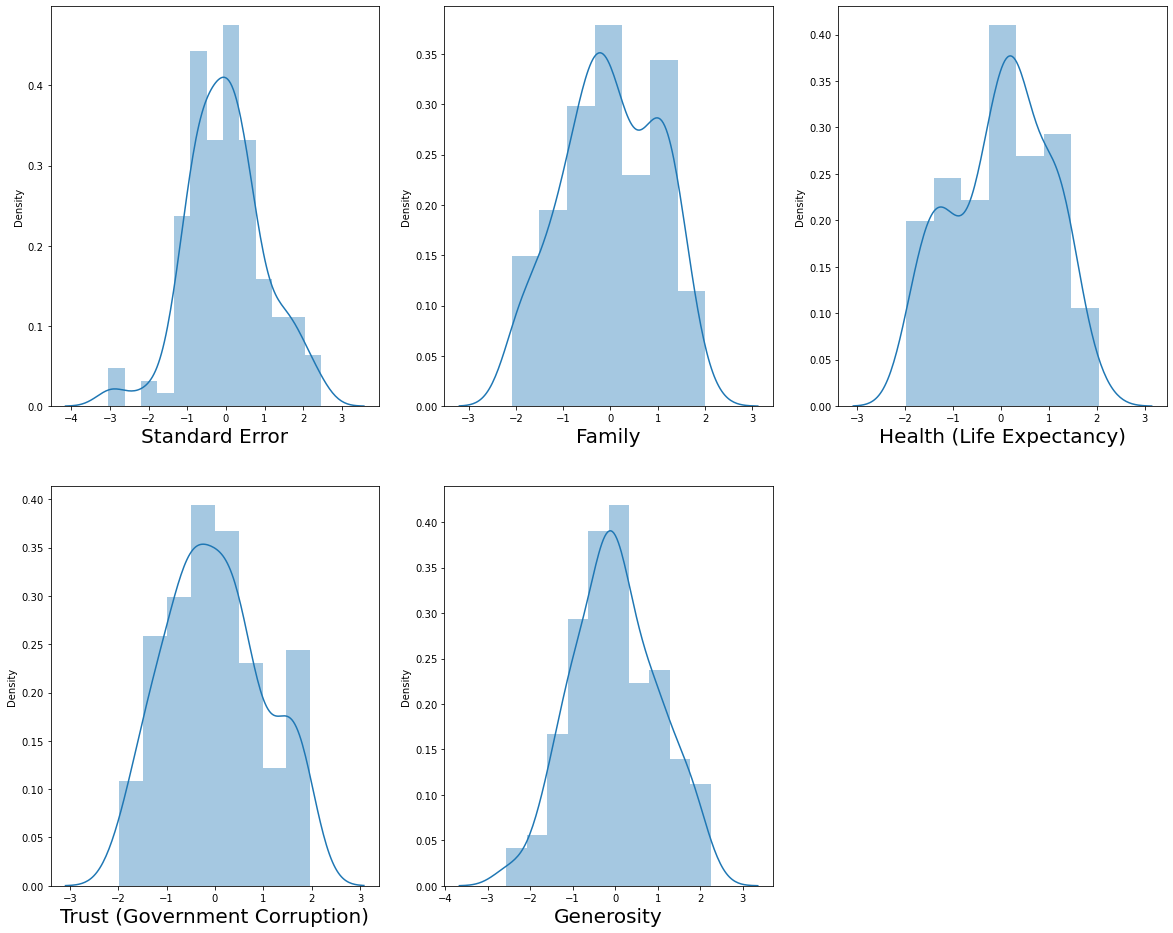

In [43]:
# After using power transformer let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

Here we can observe that the transformed data looks more normally distributed compared to previous one.

# Train_test splitting

In [44]:
x=new_df.drop("Happiness Score",axis=1)
y=new_df["Happiness Score"]

Separated the target variable and independent variable.

# Finding the best random state

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9986443839491503  on Random_state  37


Here we can observe test and train accuracy are same so we can use any random state since they are equal. Here I am using randon state 1.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=37)

We have created a new train test using Random State.

# Modeling

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as NB

# Linear Regression

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
pred_test=lr.predict(x_test)

In [50]:
print(r2_score(y_test,pred_test))

0.9985362190262856


The accuracy of Linear Regression is 99.85%

In [51]:
from sklearn import metrics

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))

0.039368087618159645


In [52]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))

0.002282782791952336


In [53]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.04777847624142419


# Decision Tree Regressor

In [54]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)
print(r2_score(y_test,pred_test))

0.9957373181481544


The accuracy of decision tree classifier is 99.69%.

In [55]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))

0.06230000000000001


In [56]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))

0.006647700000000002


In [57]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.08153342872711783


# Random Forest Regressor

In [58]:
RT=DecisionTreeRegressor()
RT.fit(x_train,y_train)
pred_test=RT.predict(x_test)
print(r2_score(y_test,pred_test))

0.9937152742906383


The accuracy of Random Forest Regressor is 99.6%

In [59]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))

0.07170000000000001


In [60]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))

0.009801100000000004


In [61]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.09900050504921681


# SVM Regressor

In [62]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9830123145168232


The accuracy of SVR is 98.3%

In [63]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))

0.14047471957558283


In [64]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))

0.026492485414462554


In [65]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.16276512345850555


KNN Regressor

In [66]:
knn=KNN()
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print(r2_score(y_test,pred_test))

0.9650167406694254


The accuracy of KNN is 96.5%.

In [67]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred_test))

0.17181333333333335


In [68]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred_test))

0.05455678400000002


In [69]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

0.23357393690221523


In the above models we can find that Random Forest Regressor has high accuracy level compared to other models.

# Hyper parameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [71]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [72]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [74]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [75]:
Final_mod = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

99.84518912548695


The model gives 99.89% accuracy which is very good.

# Saving the model

In [76]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

The model is saved as ['FinalModel.pkl']